In [1]:
def average(v):   
    ave = 0
    for i in range(len(v)):
        ave += v[i]
    return (ave/len(v))

def var(v):
    t = []
    av = average(v)
    for i in range(len(v)):
        t.append((v[i]-av)**2)
    return average(t)

def emittance(y,yprime,vx):
    t=[]
    c = 300000
    avy=average(y)
    avyprime=average(yprime)
    for i in range(len(y)):
        t.append((y[i]-avy)*(yprime[i]-avyprime))
    beta = average(vx)/c
    gamma = 1/(1+beta**2)**0.5
    emittance = ((var(y)*var(yprime)-average(t)**2)**0.5)*1000
    n_emittance = beta*gamma*emittance
    return emittance, n_emittance

### Cálculos Simion

In [2]:
import csv
import math
import matplotlib.pyplot as plt
import math

In [3]:

x4 = []
y4 = []
z4 = []
vx4 = []
vy4 = []
vz4 = []
with open('SimIon_files/old_config/data24_50mev.csv' , mode='r') as csv_file4:
    csv_reader4 = csv.reader (csv_file4, delimiter = ',')
    a=0
    for row in csv_reader4:
        if a!=0:
            x4.append(float(row[0].strip()))
            y4.append(float(row[1].strip()))
            z4.append(float(row[2].strip()))
            vx4.append(float(row[3].strip()))
            vy4.append(float(row[4].strip()))
            vz4.append(float(row[5].strip()))
        a=1

yprime4 = []
zprime4 = []
for i in range(len(x4)):
    yprime4.append(math.atan(vy4[i]/vx4[i]))
    zprime4.append(math.atan(vz4[i]/vx4[i]))
   
print('yemit',emittance(y4,yprime4,vx4))
print('zemit',emittance(z4,zprime4,vx4))

yemit (11.29351930314499, 0.025836824274310565)
zemit (11.631975149235865, 0.026611128898523486)


In [4]:
def total_parts_and_hits(array):
    c = 0
    for element in x4:
        if element!=556.0:
            c = c + 1
    return (len(array), c)

In [5]:
total_parts_and_hits(x4)

(39333, 1352)

# Calculamos el numero de particulas que no llega al final

In [6]:
print('El porcentaje de particulas que no choca es de:', 1352/len(x4)*100)

El porcentaje de particulas que no choca es de: 3.4373172654005546


# Calculamos el radio medio descontando perdidas

In [7]:
def calculate_mean_radius(length,hits):
    avg = 0
    for i in range(length):
        if (x4[i]== 556.0):  
            avg = avg + math.sqrt(y4[i]**2.0 + z4[i]**2.0)
    avg = avg/(len(x4)-hits)
    return avg

In [9]:
calculate_mean_radius(len(x4),1352)

0.7236428480241732

# el numero de particulas que caen fuera de 2 mm sobre las que llegan al final

In [13]:
def particles_inside_rfq(array):
    count = 0
    for i in range(len(array)):  
        if (x4[i]== 556):  
            if ((y4[i]**2.0 + z4[i]**2.0) < 1.0**2.0):
                count = count + 1
    count = count
    return count

In [14]:
print('Entra el', particles_inside_rfq(x4)/(len(x4)-1352)*100, 'de particulas' )

Entra el 93.12287722808773 de particulas


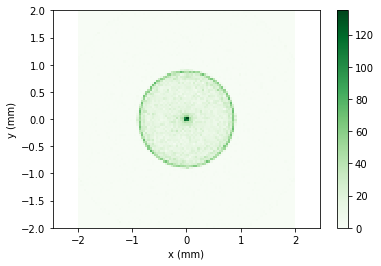

In [15]:
ax = plt.axes(autoscale_on=True)
nbins = 100
plt.hist2d(y4,z4,nbins,range = [[-2,2],[-2,2]],cmap = 'Greens')
plt.colorbar()
plt.xlim([-5,5])
plt.xlabel('x (mm)')
plt.ylabel("y (mm)")
plt.axis('equal')
plt.savefig('radio_old.jpeg')

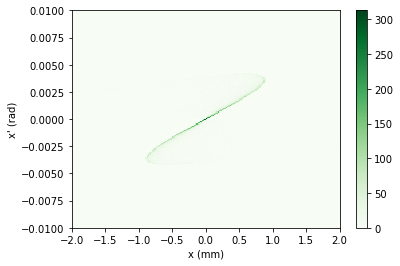

In [16]:
nbins=200
plt.hist2d(y4,yprime4,nbins,range = [[-2,2],[-0.01,0.01]],cmap = 'Greens')
plt.colorbar()
plt.xlabel('x (mm)')
plt.ylabel("x' (rad)")
plt.savefig('espacio_de_trazas_x_old.jpeg')

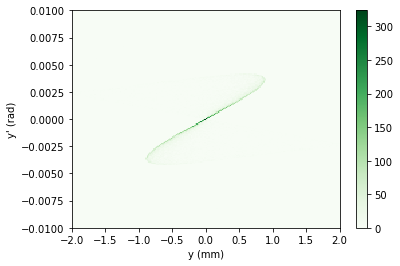

In [17]:
nbins=200
plt.hist2d(z4,zprime4,nbins,range = [[-2,2],[-0.01,0.01]],cmap = 'Greens')
plt.colorbar()
plt.xlabel('y (mm)')
plt.ylabel("y' (rad)")
plt.savefig('espacio_de_trazas_y_old.jpeg')